In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from datetime import timedelta
plt.rcParams['font.family']='Arial'
plt.rcParams['font.size']=13

In [2]:
def round_to_hour(dt):
    dt_start_of_hour = dt.replace(minute=0)
    dt_half_hour = dt.replace(minute=30)

    if dt >= dt_half_hour:
        # round up
        dt = dt_start_of_hour + timedelta(hours=1)
    else:
        # round down
        dt = dt_start_of_hour

    return dt

def round_to_half_hour(dt):
    dt_half_hour = dt.replace(minute=30)
    return dt_half_hour

In [3]:
merra_full = pd.read_csv('../Output Data/merra_full.txt',sep='\t')

merra_full['datetime'] = merra_full[['date','time']].apply(lambda x:x[0]+' '+x[1],axis=1)

merra_full['datetime'] = merra_full['datetime'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [4]:
#nighttime seeing with era5

In [5]:
seeing_night_hanle = pd.read_csv('../Project Data/seeing-hanle-2k11-2k13.dat', sep = '\s+')

In [6]:
#since we are giving multiple columns in apply. we have to specify axis
seeing_night_hanle['date']=seeing_night_hanle[['YYYY','MM','DD']].apply(lambda x: datetime(x[0],x[1],x[2]).date(),axis=1)

In [7]:
#nighttime and pblh merra

In [8]:
merr_nighttime = pd.read_csv('../Output Data/merra_nighttime.txt',sep='\t',parse_dates=['date'])

In [9]:
merr_nighttime['date'] = merr_nighttime['date'].apply(lambda x:x.date())

In [10]:
merged_nighttime_merr = pd.merge(seeing_night_hanle,merr_nighttime,how='left',left_on=['date'],right_on=['date'])

In [11]:
ex_merged_nighttime_merr_hanle = merged_nighttime_merr[['date','PT','See1','See2','han_pblh_avg','han_pblh_median']]

In [12]:
ex_merged_nighttime_merr_hanle.columns = ['Date','PT','Seeing_avg','Seeing_median','hanle_pblh_avg','hanle_pblh_median']

In [13]:
ex_merged_nighttime_merr_hanle = ex_merged_nighttime_merr_hanle.round(decimals = 3)

In [14]:
ex_merged_nighttime_merr_hanle.to_csv('../Output Data/Combined/Hanle_nightseeing_pblh_merra.txt',sep='\t',index=False)

In [15]:
merged_nighttime_merra_monthly = merged_nighttime_merr.groupby(['YYYY','MM']).median()

In [16]:
seeing_monthly = merged_nighttime_merra_monthly.groupby('MM').median().reset_index()

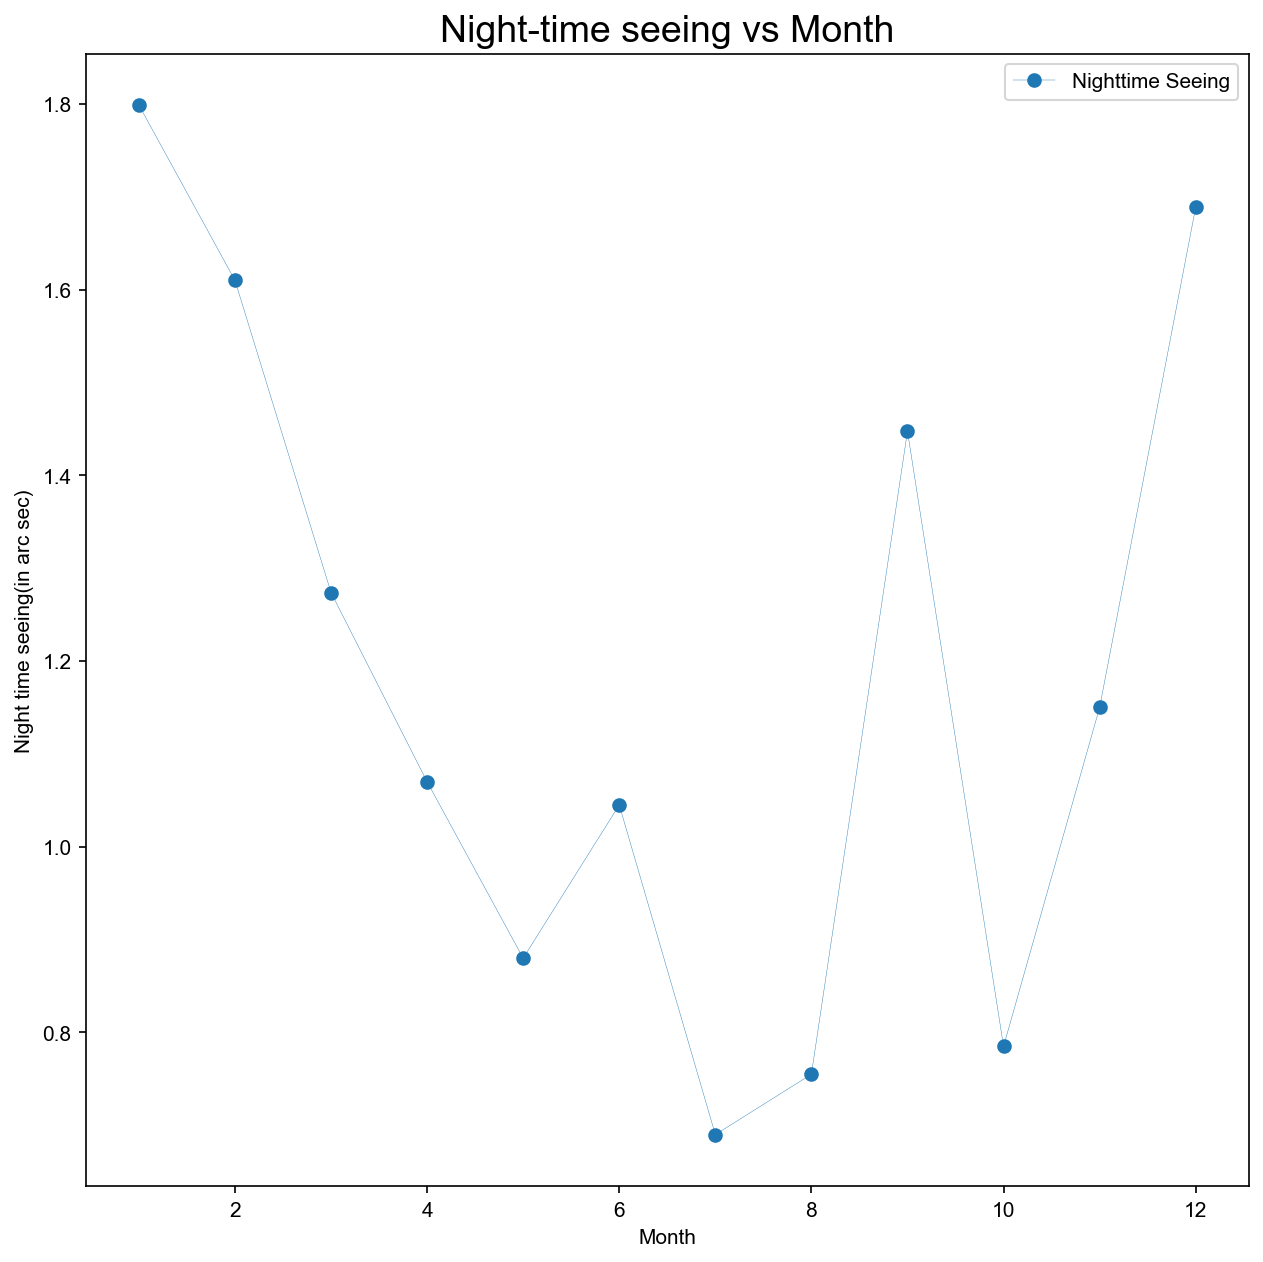

In [17]:
plt.figure(figsize=(10,10),dpi=150)
plt.plot(seeing_monthly['MM'],seeing_monthly['See2'],marker='o',linewidth=0.2,label = 'Nighttime Seeing')
#plt.plot(merged_nighttime_merra_monthly['See2'], fit_fn(merged_nighttime_merra_monthly['See2']), ':r',label='linear fit')
plt.title('Night-time seeing vs Month',fontsize=18)
#plt.text(1.5,1.5,'r = -0.4853',fontsize=15,fontstyle="italic")
plt.ylabel('Night time seeing(in arc sec)')
plt.xlabel('Month')
plt.legend(loc='upper right')
plt.savefig('../Plots/Month vs. Nighttime seeing.png')
plt.show()


In [18]:
fit = np.polyfit(merged_nighttime_merra_monthly['See2'],merged_nighttime_merra_monthly['han_pblh_median'],1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y



In [19]:
plt.scatter?

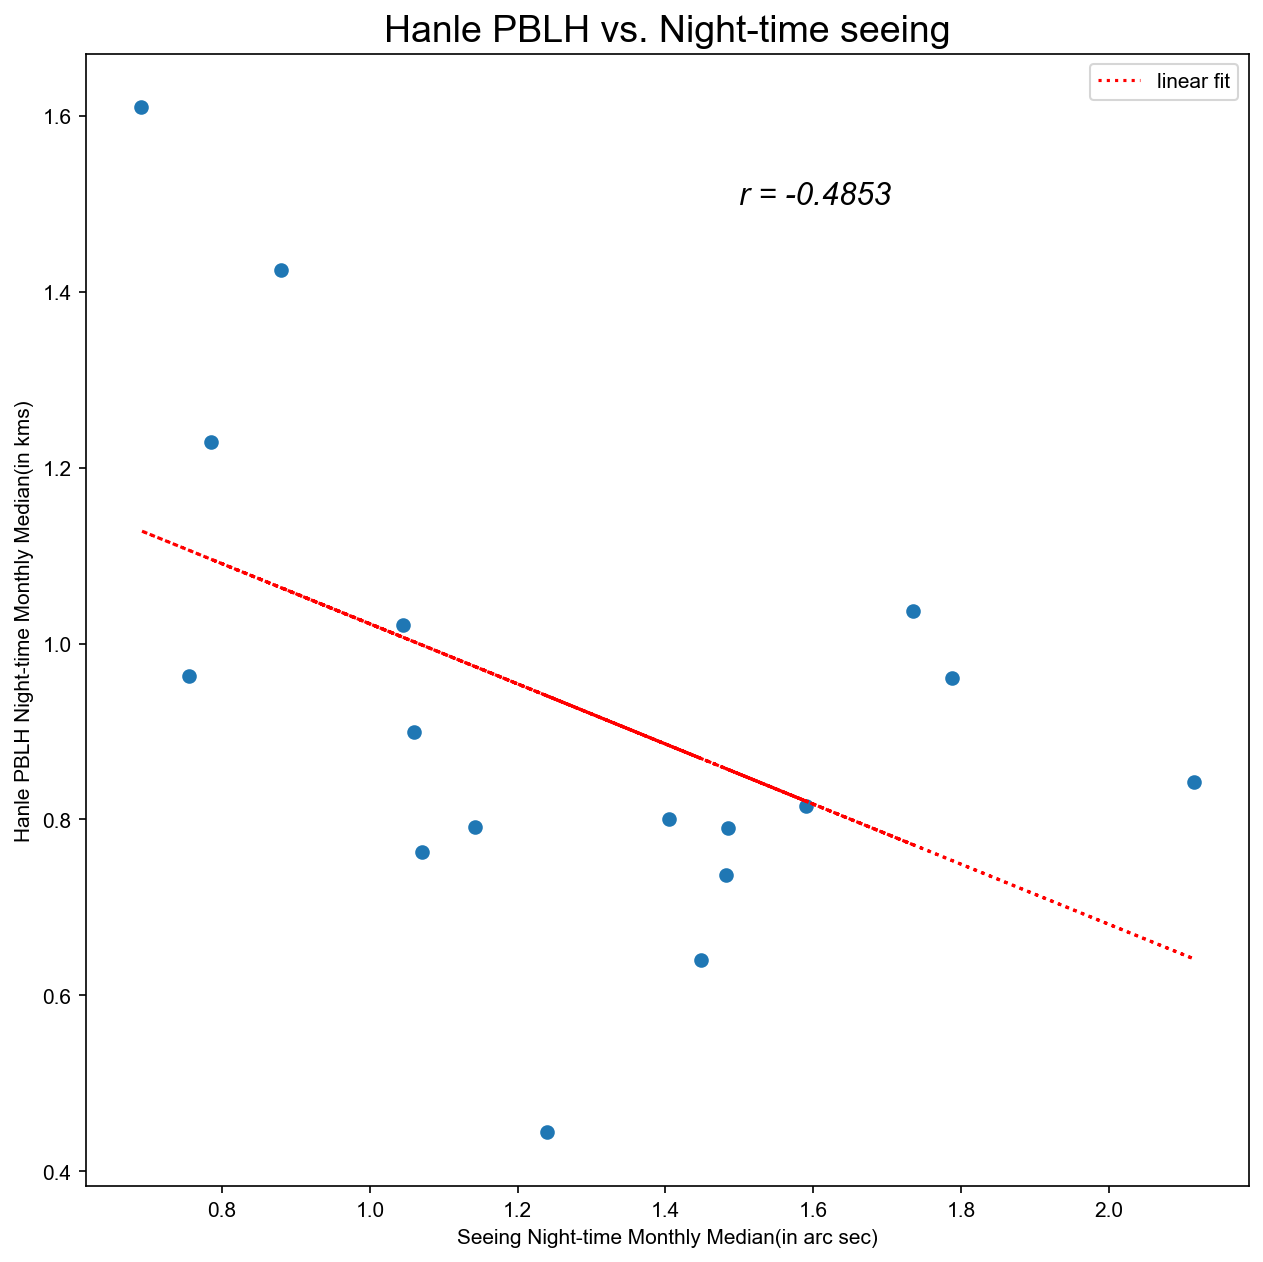

In [20]:
plt.figure(figsize=(10,10),dpi=150)
plt.scatter(merged_nighttime_merra_monthly['See2'],merged_nighttime_merra_monthly['han_pblh_median'],marker='o')
plt.plot(merged_nighttime_merra_monthly['See2'], fit_fn(merged_nighttime_merra_monthly['See2']), ':r',label='linear fit')
plt.title('Hanle PBLH vs. Night-time seeing',fontsize=18)
plt.text(1.5,1.5,'r = -0.4853',fontsize=15,fontstyle="italic")
plt.ylabel('Hanle PBLH Night-time Monthly Median(in kms)')
plt.xlabel('Seeing Night-time Monthly Median(in arc sec)')
plt.legend(loc='upper right')
plt.savefig('../Plots/Hanle PBLH vs. Nighttime seeing.png')
plt.show()


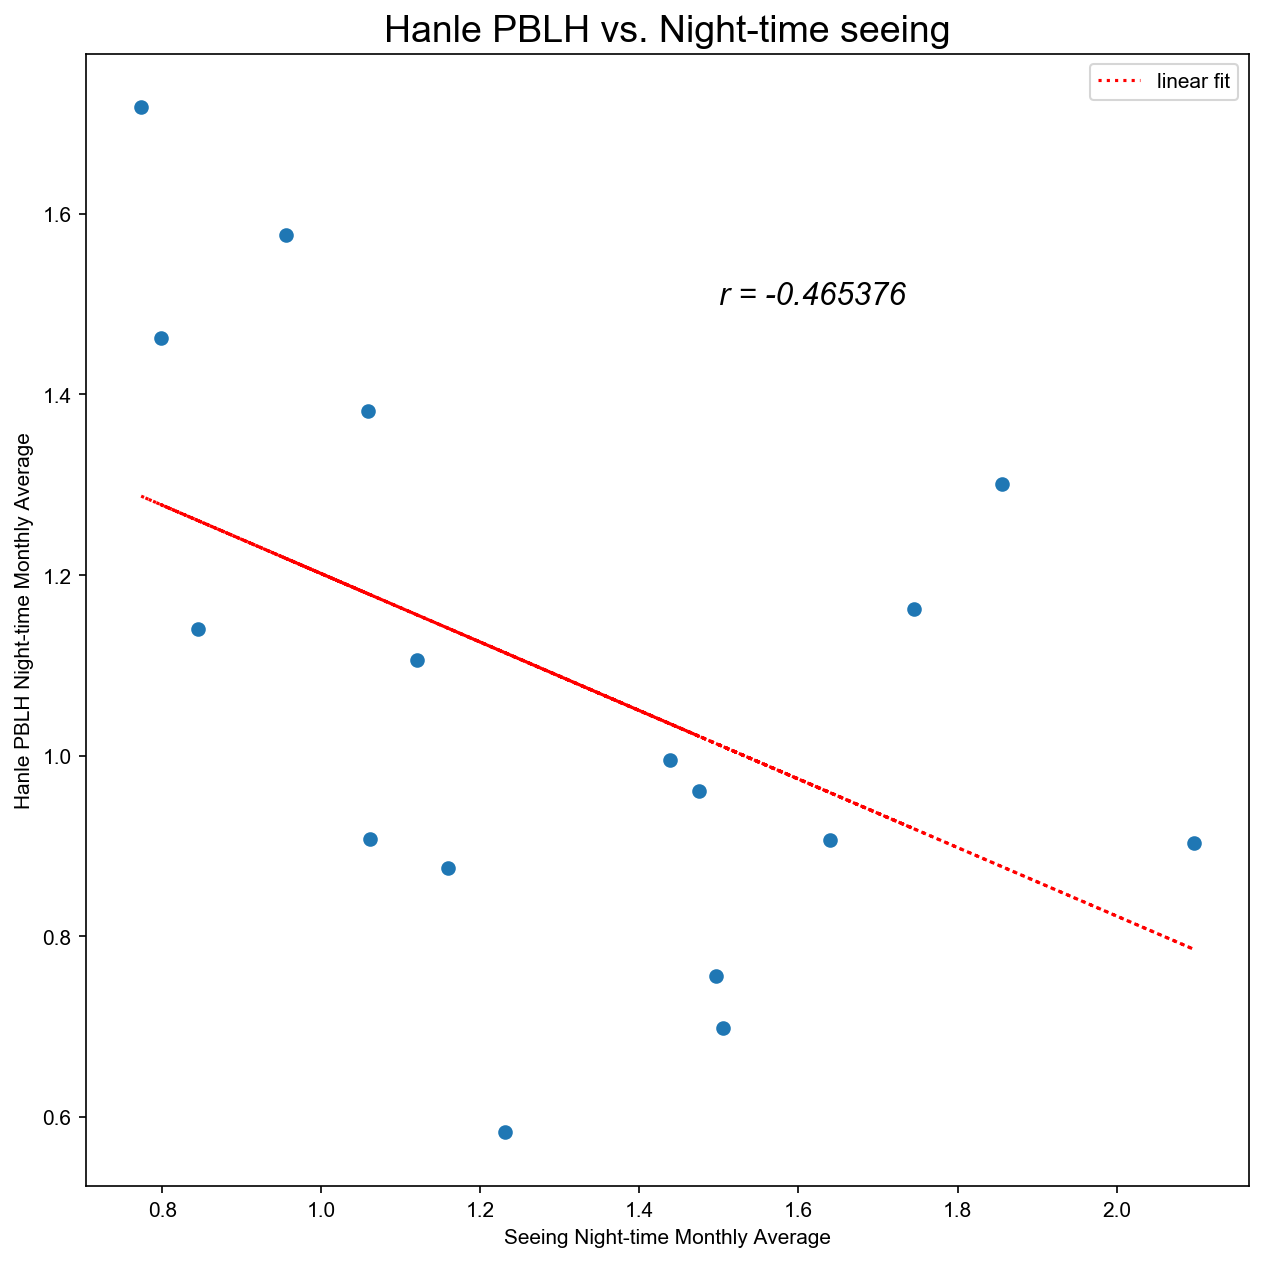

In [21]:
fit = np.polyfit(merged_nighttime_merra_monthly['See1'],merged_nighttime_merra_monthly['han_pblh_avg'],1)
fit_fn = np.poly1d(fit) 
plt.figure(figsize=(10,10),dpi=150)
plt.scatter(merged_nighttime_merra_monthly['See1'],merged_nighttime_merra_monthly['han_pblh_avg'],marker='o')
plt.plot(merged_nighttime_merra_monthly['See1'], fit_fn(merged_nighttime_merra_monthly['See1']), ':r',label='linear fit')
plt.title('Hanle PBLH vs. Night-time seeing',fontsize=18)
plt.text(1.5,1.5,'r = -0.465376',fontsize=15,fontstyle="italic")
plt.ylabel('Hanle PBLH Night-time Monthly Average')
plt.xlabel('Seeing Night-time Monthly Average')
plt.legend(loc='upper right')
plt.savefig('../Plots/Hanle PBLH vs. Nighttime seeing avg.png')
plt.show()
plt.close()

In [22]:
#hanle daytime r0 with era5 and merra

In [23]:
r0_hanle_daytime = pd.read_csv('../Project Data/Hanle_r0_med_stddev.txt', sep='\s+',header=None)

In [24]:
r0_hanle_daytime.columns=['days','r0_median','std dev']

In [25]:
datelist = []
the_date = datetime(2007,1,1).date()
id_tracker = 0
for date_id in r0_hanle_daytime['days'].values:
    if(date_id < id_tracker):
        the_date = datetime(the_date.year+1, 1,1).date()
    current_date = the_date + timedelta(days = int(date_id)-1)
    datelist.append(current_date)
    id_tracker = int(date_id)

In [26]:
r0_hanle_daytime['date'] = datelist

In [27]:
merr_daytime = pd.read_csv('../Output Data/merra_daytime.txt',sep='\t',parse_dates=['date'])

In [28]:
merr_daytime['date'] = merr_daytime['date'].apply(lambda x:x.date())

In [29]:
#getting monthly to plot monthly of merra and r0 hanle

In [30]:
merr_daytime['year'] = merr_daytime['date'].apply(lambda x:x.year)
merr_daytime['month'] = merr_daytime['date'].apply(lambda x:x.month)

In [31]:
monthly_median_day_merra_pblh = merr_daytime.groupby(['year','month']).median().reset_index([0,1])

In [32]:
r0_hanle_daytime['year'] = r0_hanle_daytime['date'].apply(lambda x:x.year)
r0_hanle_daytime['month'] = r0_hanle_daytime['date'].apply(lambda x:x.month)

In [33]:
monthly_r0_median = r0_hanle_daytime.groupby(['year','month']).median().reset_index([0,1])

In [34]:
merged_lol = pd.merge(monthly_r0_median,monthly_median_day_merra_pblh,how='left',left_on = ['year','month'],right_on=['year','month'])

In [35]:
merged_r0_merra_hanle = pd.merge(r0_hanle_daytime,merr_daytime,how='left',left_on = ['date'],right_on=['date'])

In [36]:
ex_merged_r0_merra_hanle = merged_r0_merra_hanle[['date','r0_median','std dev','han_pblh_median']]

In [37]:
ex_merged_r0_merra_hanle.columns=['Date','r0_median','Std dev','Hanle_pblh_median']

In [38]:
ex_merged_r0_merra_hanle = ex_merged_r0_merra_hanle.round(decimals=3)

In [39]:
ex_merged_r0_merra_hanle.to_csv('../Output Data/Combined/Hanle_r0_pblh_Merra.txt',sep='\t',index=False)

In [40]:
merged_r0_merra_hanle_monthly = merged_lol.copy(deep=True)

In [41]:
merged_r0_merra_hanle_monthly.corr()

,year,month,days,r0_median,std dev,han_pblh_avg,mer_pblh_avg,han_pblh_median,mer_pblh_median
year,1.000000,-0.493114,-0.499698,-0.278561,0.111122,0.013964,-0.129804,-0.094302,-0.113717
month,-0.493114,1.000000,0.999479,-0.090274,0.083330,-0.248828,0.273097,-0.175081,0.197954
days,-0.499698,0.999479,1.000000,-0.084982,0.069977,-0.262196,0.272732,-0.189644,0.196747
r0_median,-0.278561,-0.090274,-0.084982,1.000000,0.403640,-0.315838,0.303381,-0.044451,0.507047
std dev,0.111122,0.083330,0.069977,0.403640,1.000000,-0.026540,0.295505,0.223598,0.473042
han_pblh_avg,0.013964,-0.248828,-0.262196,-0.315838,-0.026540,1.000000,0.137037,0.851150,0.091820
mer_pblh_avg,-0.129804,0.273097,0.272732,0.303381,0.295505,0.137037,1.000000,0.372718,0.887974
han_pblh_median,-0.094302,-0.175081,-0.189644,-0.044451,0.223598,0.851150,0.372718,1.000000,0.451419
mer_pblh_median,-0.113717,0.197954,0.196747,0.507047,0.473042,0.091820,0.887974,0.451419,1.000000


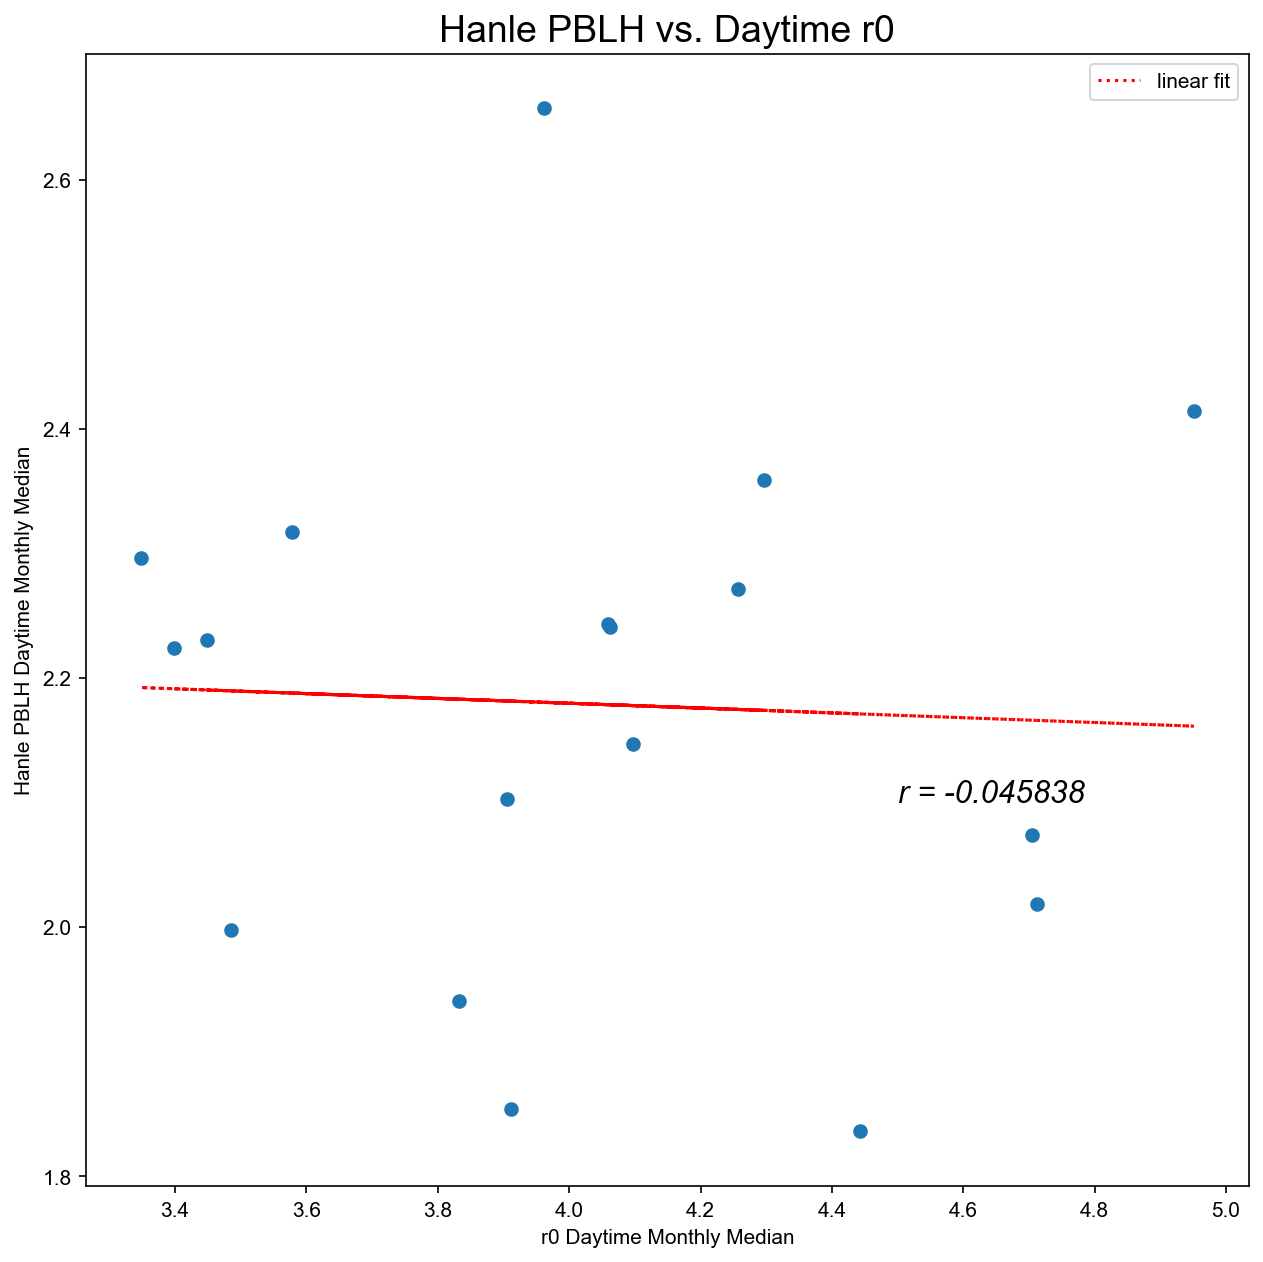

In [42]:
fit = np.polyfit(merged_r0_merra_hanle_monthly['r0_median'],merged_r0_merra_hanle_monthly['han_pblh_median'],1)
fit_fn = np.poly1d(fit) 
plt.figure(figsize=(10,10),dpi=150)
plt.scatter(merged_r0_merra_hanle_monthly['r0_median'],merged_r0_merra_hanle_monthly['han_pblh_median'],marker='o')
plt.plot(merged_r0_merra_hanle_monthly['r0_median'], fit_fn(merged_r0_merra_hanle_monthly['r0_median']), ':r',label='linear fit')
plt.title('Hanle PBLH vs. Daytime r0',fontsize=18)
plt.text(4.5,2.1,'r = -0.045838',fontsize=15,fontstyle="italic")
plt.ylabel('Hanle PBLH Daytime Monthly Median')
plt.xlabel('r0 Daytime Monthly Median')
plt.legend(loc='upper right')
plt.savefig('../Plots/Hanle PBLH vs r0 median.png')
plt.show()
plt.close()

In [43]:
#merak r0 hourly with era5

In [44]:
r0_hourly_merak = pd.read_csv('../Project Data/Merak_r0_doy_date_median_sd_hrly.txt', sep='\s+',header=None)

r0_hourly_merak.columns = ['day','date','hour','r0','stddev']

r0_hourly_merak['date'] = r0_hourly_merak['date'].apply(lambda x:str(x))

r0_hourly_merak.head(10)

datelist_mer = []
the_date = datetime(2008,1,1).date()
id_tracker = 0
for date_id in r0_hourly_merak['day'].values:
    if(date_id < id_tracker):
        the_date = datetime(the_date.year+1, 1,1).date()
    current_date = the_date + timedelta(days = int(date_id)-1)
    datelist_mer.append(current_date)
    id_tracker = int(date_id)

r0_hourly_merak['date'] = datelist_mer

r0_hourly_merak['month'] = r0_hourly_merak['date'].apply(lambda x:x.month)
r0_hourly_merak['year'] = r0_hourly_merak['date'].apply(lambda x:x.year)

In [45]:
r0_hourly_merak = r0_hourly_merak[r0_hourly_merak.r0 != 0].reset_index(drop=True)

In [46]:
r0_hourly_merak_2 = r0_hourly_merak[['date','hour','r0','stddev']]

In [47]:
def add_time(date,hour):
    the_date = datetime.combine(date,datetime.min.time())
    if(hour != 0):
        the_date = the_date + timedelta(hours=hour)
    else:
        the_date = the_date
    return the_date

In [48]:
r0_hourly_merak_2['datetime']=r0_hourly_merak_2[['date','hour']].apply(lambda x:add_time(x[0],x[1]),axis=1)

D:\Anaconda\envs\IIA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
r0_hourly_merak_2['rounded'] = r0_hourly_merak_2['datetime'].apply(lambda x:round_to_half_hour(x))

D:\Anaconda\envs\IIA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
r0_pblh_merak_hourly = pd.merge(r0_hourly_merak_2,merra_full,how='left',left_on=['rounded'],right_on=['datetime'])

In [51]:
ex_r0_pblh_merak_hourly = r0_pblh_merak_hourly[['datetime_x','r0','stddev','mer_pblh']]

In [52]:
ex_r0_pblh_merak_hourly.columns = ['Datetime','r0','Std Dev','Merak PBLH Merra']

In [53]:
ex_r0_pblh_merak_hourly = ex_r0_pblh_merak_hourly.round(decimals=3)

In [54]:
ex_r0_pblh_merak_hourly.corr()

,r0,Std Dev,Merak PBLH Merra
r0,1.000000,0.154888,0.279665
Std Dev,0.154888,1.000000,0.295509
Merak PBLH Merra,0.279665,0.295509,1.000000


In [55]:
ex_r0_pblh_merak_hourly.to_csv('../Output Data/Combined/Merak Hourly r0 Pblh.txt',sep='\t',index=False)

In [56]:
r0_pblh_merak_hourly['Year'] = r0_pblh_merak_hourly['datetime_x'].apply(lambda x:x.year)
r0_pblh_merak_hourly['Month'] = r0_pblh_merak_hourly['datetime_x'].apply(lambda x:x.month)


In [57]:
r0_pblh_merak_monthly = r0_pblh_merak_hourly[['r0','stddev','mer_pblh','Year','Month']].groupby(['Year','Month']).median()

In [58]:
r0_pblh_merak_monthly['see'] = r0_pblh_merak_monthly['r0'].apply(lambda x: (2.015*(10**(-2)*500)/x))

In [59]:
r0_pblh_merak_monthly.head(10)

r0   stddev  mer_pblh       see
Year Month                                     
2008 10     6.0771  0.71190  2.608599  1.657863
     11     5.3979  0.53645  2.683955  1.866467
     12     5.2163  0.40395  1.899449  1.931446
2009 1      4.1143  0.34640  2.178423  2.448776
     2      5.1566  0.57710  2.132588  1.953807
     3      6.5667  0.48210  2.733277  1.534256
     4      6.3499  0.81320  2.770431  1.586639
     5      7.1588  1.11600  3.023380  1.407359
     6      5.5235  1.11110  2.811650  1.824025

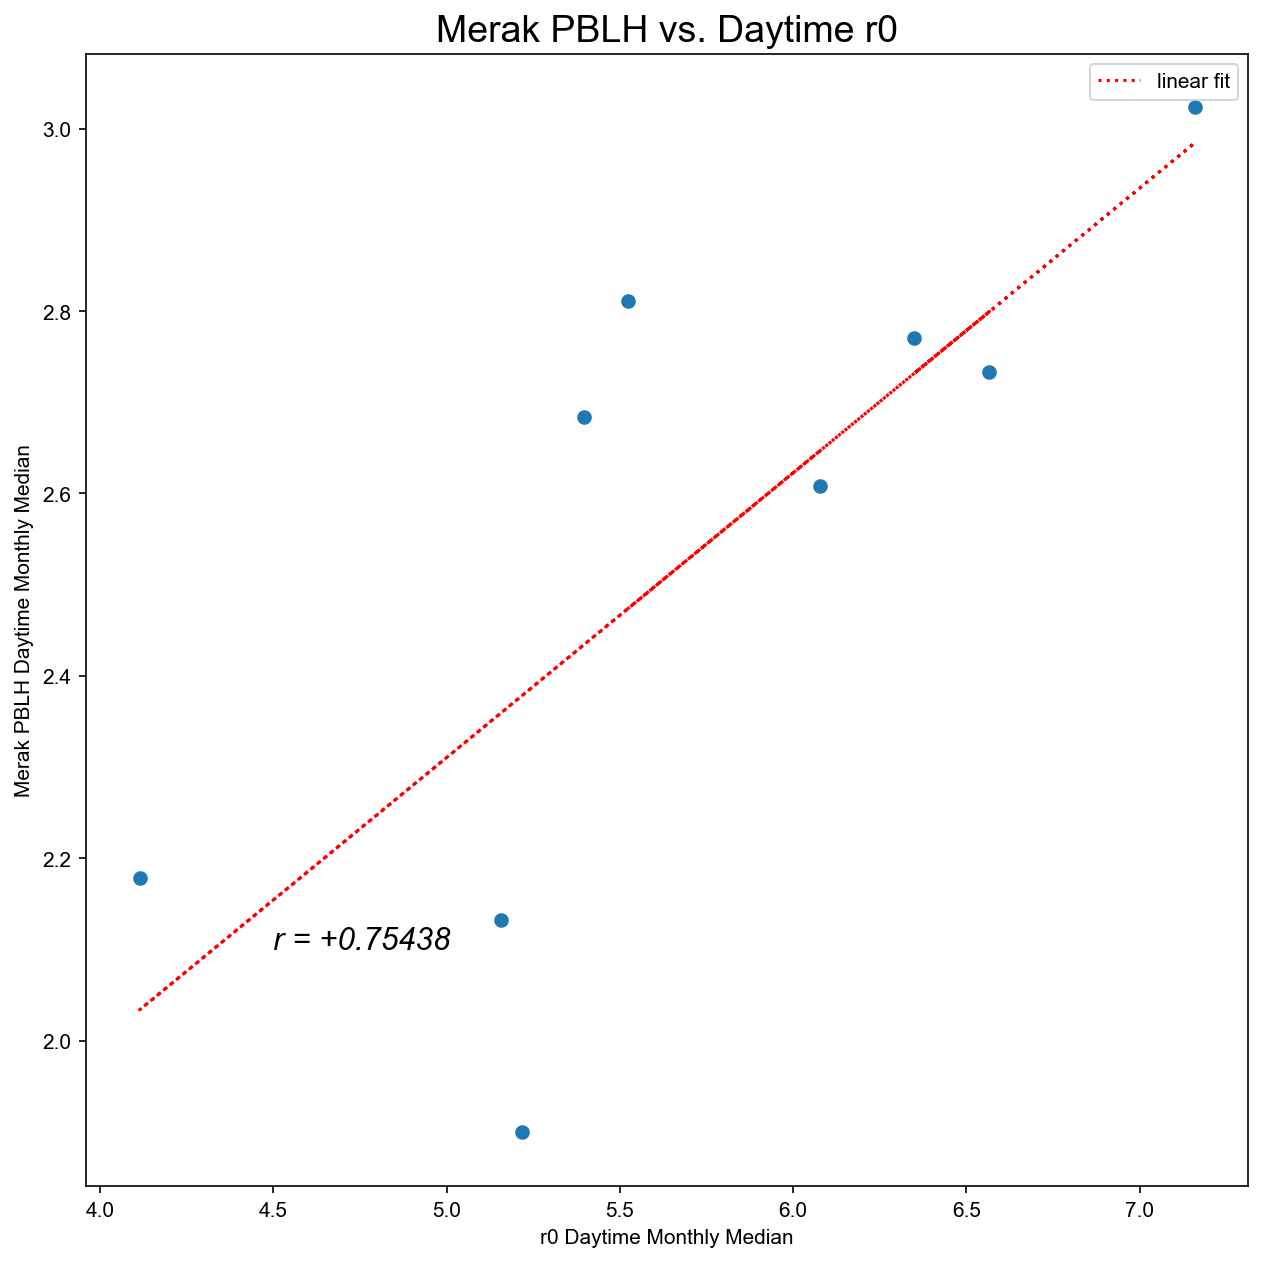

In [60]:
fit = np.polyfit(r0_pblh_merak_monthly['r0'],r0_pblh_merak_monthly['mer_pblh'],1)
fit_fn = np.poly1d(fit) 
plt.figure(figsize=(10,10),dpi=150)
plt.scatter(r0_pblh_merak_monthly['r0'],r0_pblh_merak_monthly['mer_pblh'],marker='o')
plt.plot(r0_pblh_merak_monthly['r0'], fit_fn(r0_pblh_merak_monthly['r0']), ':r',label='linear fit')
plt.title('Merak PBLH vs. Daytime r0',fontsize=18)
plt.text(4.5,2.1,'r = +0.75438',fontsize=15,fontstyle="italic")
plt.ylabel('Merak PBLH Daytime Monthly Median')
plt.xlabel('r0 Daytime Monthly Median')
plt.legend(loc='upper right')
plt.savefig('../Plots/Merak PBLH vs r0 median.png')
plt.show()
plt.close()

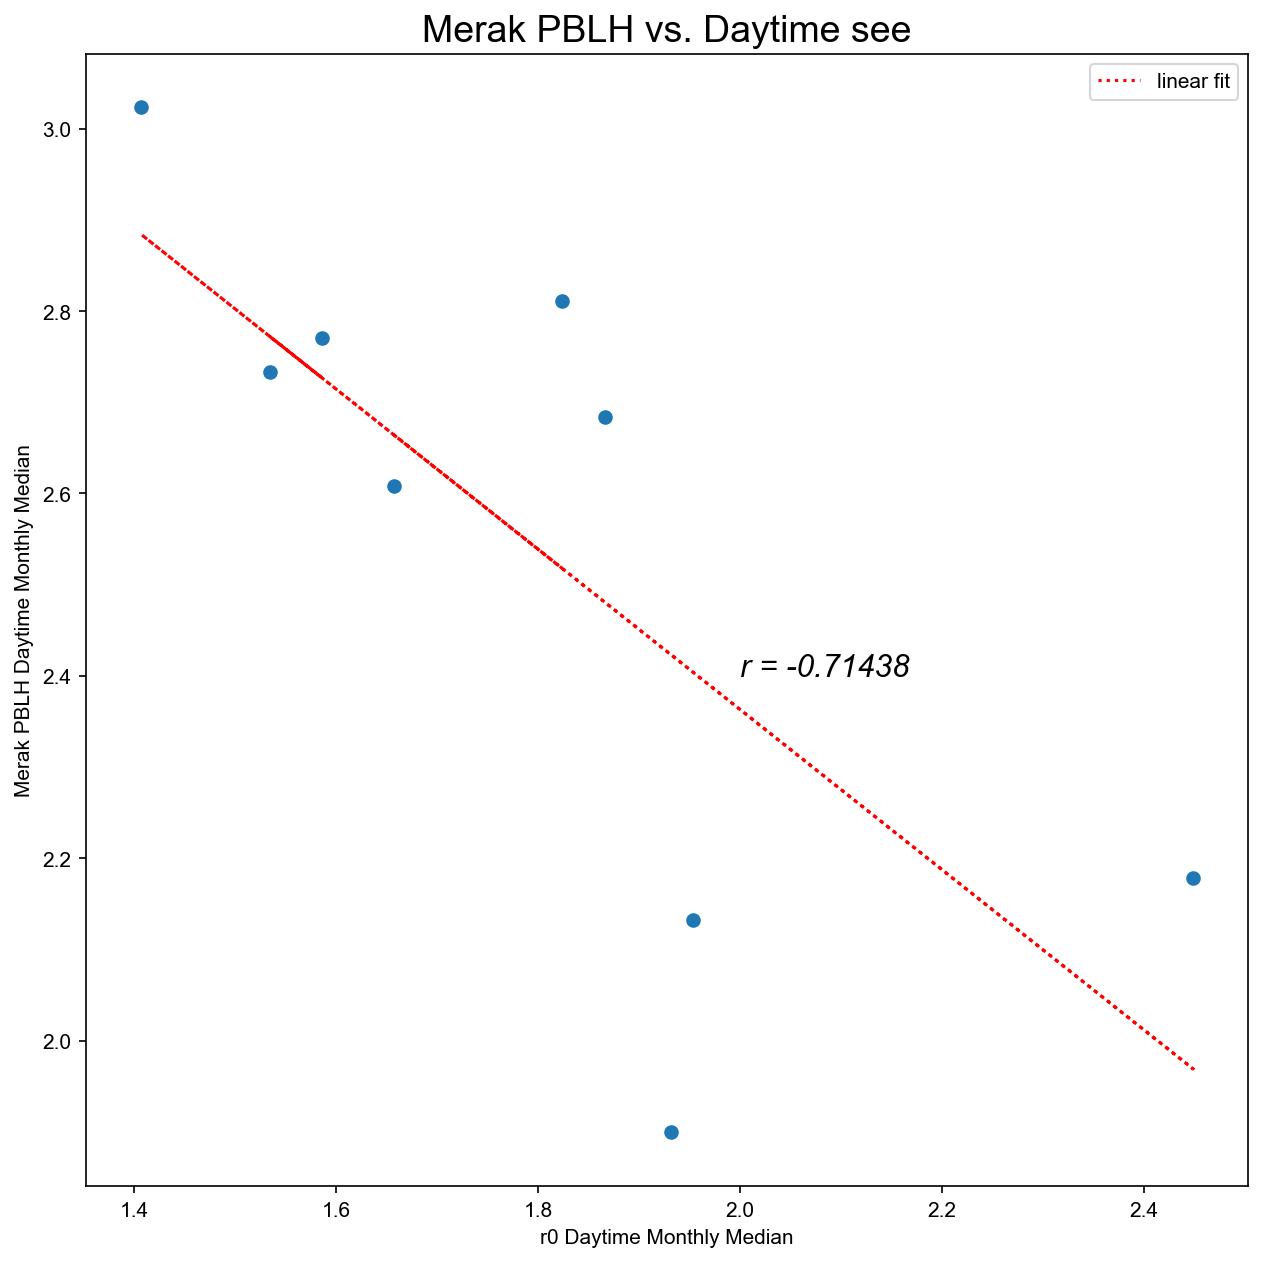

In [61]:
fit = np.polyfit(r0_pblh_merak_monthly['see'],r0_pblh_merak_monthly['mer_pblh'],1)
fit_fn = np.poly1d(fit) 
plt.figure(figsize=(10,10),dpi=150)
plt.scatter(r0_pblh_merak_monthly['see'],r0_pblh_merak_monthly['mer_pblh'],marker='o')
plt.plot(r0_pblh_merak_monthly['see'], fit_fn(r0_pblh_merak_monthly['see']), ':r',label='linear fit')
plt.title('Merak PBLH vs. Daytime see',fontsize=18)
plt.text(2.0,2.4,'r = -0.71438',fontsize=15,fontstyle="italic")
plt.ylabel('Merak PBLH Daytime Monthly Median')
plt.xlabel('r0 Daytime Monthly Median')
plt.legend(loc='upper right')
plt.savefig('../Plots/Merak PBLH vs see median.png')
plt.show()
plt.close()

In [62]:
r0_merak_daily = pd.read_csv('../Project Data/Merak_r0_doy_date_median_sd.txt',sep='\s+',header=None)

r0_merak_daily.columns=('day','date','r0','std_dev')

datelist_mer_daily = []
the_date = datetime(2008,1,1).date()
id_tracker = 0
for date_id in r0_merak_daily['day'].values:
    if(date_id < id_tracker):
        the_date = datetime(the_date.year+1, 1,1).date()
    current_date = the_date + timedelta(days = int(date_id)-1)
    datelist_mer_daily.append(current_date)
    id_tracker = int(date_id)

r0_merak_daily.date=datelist_mer_daily

In [63]:
r0_merak_daily['month'] = r0_merak_daily['date'].apply(lambda x:x.month)
r0_merak_daily['year'] = r0_merak_daily['date'].apply(lambda x:x.year)

In [64]:
r0_merak_monthly_2 = r0_merak_daily.groupby(['year','month']).median().reset_index()

In [65]:
merra_monthly = monthly_median_day_merra_pblh.copy(deep=True)

In [66]:
merged_daily_merak = pd.merge(r0_merak_monthly_2,merra_monthly,how='left',left_on=['year','month'],right_on=['year','month'])

In [67]:
merged_daily_merak.corr()

,year,month,day,r0,std_dev,han_pblh_avg,mer_pblh_avg,han_pblh_median,mer_pblh_median
year,1.000000,-0.923186,-0.932830,0.094027,0.317150,0.460700,0.379028,0.418683,0.337638
month,-0.923186,1.000000,0.999323,0.132856,-0.054210,-0.432753,-0.282490,-0.267948,-0.172532
day,-0.932830,0.999323,1.000000,0.134778,-0.062779,-0.431361,-0.284378,-0.271939,-0.178779
r0,0.094027,0.132856,0.134778,1.000000,0.738241,0.381986,0.419988,0.598936,0.458431
std_dev,0.317150,-0.054210,-0.062779,0.738241,1.000000,0.694177,0.671107,0.896958,0.680926
han_pblh_avg,0.460700,-0.432753,-0.431361,0.381986,0.694177,1.000000,0.657366,0.887847,0.457726
mer_pblh_avg,0.379028,-0.282490,-0.284378,0.419988,0.671107,0.657366,1.000000,0.746161,0.955754
han_pblh_median,0.418683,-0.267948,-0.271939,0.598936,0.896958,0.887847,0.746161,1.000000,0.659385
mer_pblh_median,0.337638,-0.172532,-0.178779,0.458431,0.680926,0.457726,0.955754,0.659385,1.000000


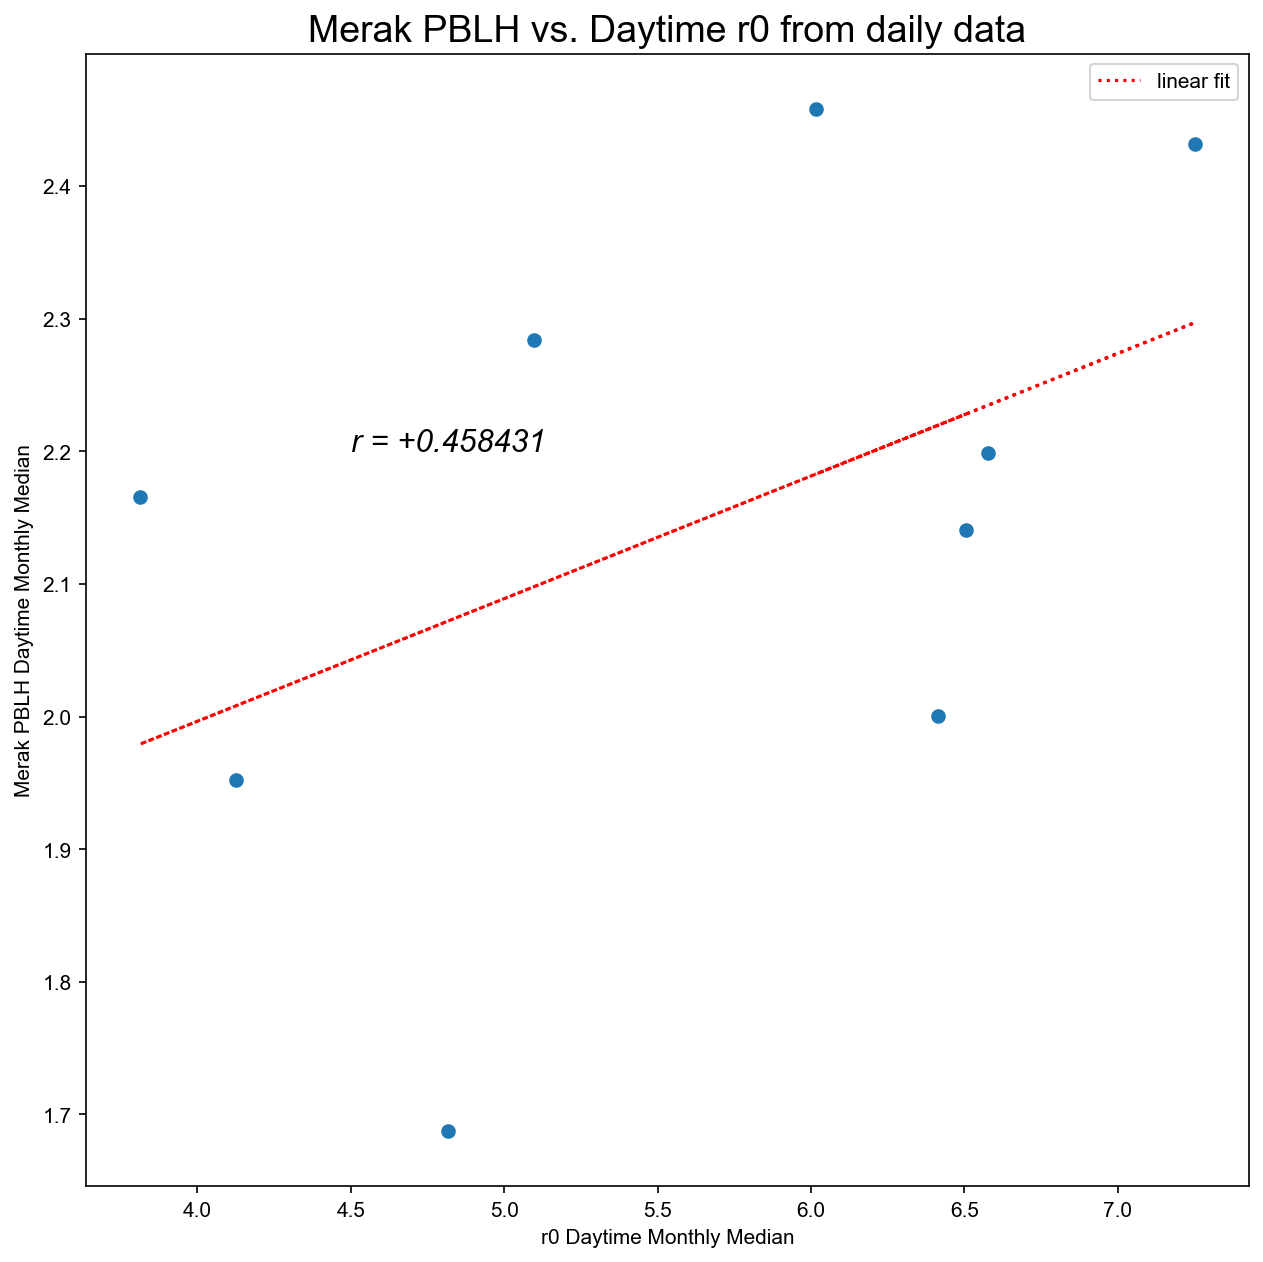

In [68]:
fit = np.polyfit(merged_daily_merak['r0'],merged_daily_merak['mer_pblh_median'],1)
fit_fn = np.poly1d(fit) 
plt.figure(figsize=(10,10),dpi=150)
plt.scatter(merged_daily_merak['r0'],merged_daily_merak['mer_pblh_median'],marker='o')
plt.plot(merged_daily_merak['r0'], fit_fn(merged_daily_merak['r0']), ':r',label='linear fit')
plt.title('Merak PBLH vs. Daytime r0 from daily data',fontsize=18)
plt.text(4.5,2.2,'r = +0.458431',fontsize=15,fontstyle="italic")
plt.ylabel('Merak PBLH Daytime Monthly Median')
plt.xlabel('r0 Daytime Monthly Median')
plt.legend(loc='upper right')
plt.savefig('../Plots/Merak PBLH vs r0 median daily data.png')
plt.show()
plt.close()

In [69]:
cloud_aqua = pd.read_csv('../Project Data/cf_aqua.txt',sep='\s+',header=None)

In [70]:
cloud_aqua.columns=['Year','days','hour','min','hanle_cf','merak_cf']

In [71]:
datelist_aqua = []
the_date = datetime(2018,1,1,0,0)
id_tracker = 0
for date_id in cloud_aqua['days'].values:
    if(date_id < id_tracker):
        the_date = datetime(the_date.year+1, 1,1)
    current_date = the_date + timedelta(days = int(date_id)-1)
    datelist_mer.append(current_date)
    id_tracker = int(date_id)

In [72]:
def date_generator(year,days,hours,mins):
    the_date = datetime(year,1,1)
    if(mins != 0):
        the_date = the_date + timedelta(days=days-1,hours=hours,minutes=mins)
    else:
        the_date = the_date + timedelta(days=days-1,hours=hours)
    return the_date

In [73]:
# for i,the_row in cloud_aqua.iterrows():
#     date_generator(int(the_row['Year']), int(the_row['days']), int(the_row['hour']),int(the_row['min']))

In [74]:
cloud_aqua['datetime'] = cloud_aqua[['Year','days','hour','min']].apply(lambda x: date_generator(int(x[0]),int(x[1]),int(x[2]),int(x[3])),axis=1)

In [75]:
cloud_aqua['nearest hour'] = cloud_aqua['datetime'].apply(lambda x: round_to_hour(x))

In [76]:

del cloud_aqua['days']
del cloud_aqua['hour']
del cloud_aqua['min']

In [77]:
cloud_aqua['month'] = cloud_aqua['datetime'].apply(lambda x:x.month)

In [78]:
cloud_aqua['nearest 30min'] = cloud_aqua['datetime'].apply(lambda x: round_to_half_hour(x))

In [79]:
merge_cloud = pd.merge(cloud_aqua,merra_full,how='left',left_on=['nearest 30min'],right_on=['datetime'],suffixes=('_cf','_era5'))

In [80]:
#merge_cloud = pd.merge(merge_cloud,merra_full,how='left',left_on=['nearest 30min'],right_on=['datetime'])

In [81]:
merge_cloud_noneg = merge_cloud[merge_cloud['hanle_cf']>=0]

In [82]:
merge_cloud_monthly = merge_cloud_noneg.groupby(['Year','month']).median()

In [83]:
merge_cloud_monthly.corr()

,hanle_cf,merak_cf,han_pblh,mer_pblh
hanle_cf,1.000000,0.370244,-0.270760,0.115645
merak_cf,0.370244,1.000000,-0.093337,-0.140399
han_pblh,-0.270760,-0.093337,1.000000,0.719311
mer_pblh,0.115645,-0.140399,0.719311,1.000000


In [84]:
cloud_terra = pd.read_csv('../Project Data/cf_terra.txt',sep='\s+',header=None)

In [85]:
cloud_terra.columns=['Year','days','hour','min','hanle_cf','merak_cf']

In [86]:
cloud_terra['datetime'] = cloud_terra[['Year','days','hour','min']].apply(lambda x: date_generator(int(x[0]),int(x[1]),int(x[2]),int(x[3])),axis=1)

In [87]:

del cloud_terra['days']
del cloud_terra['hour']
del cloud_terra['min']

In [88]:
cloud_terra['month'] = cloud_terra['datetime'].apply(lambda x:x.month)

In [89]:
cloud_terra['nearest hour'] = cloud_terra['datetime'].apply(lambda x: round_to_hour(x))

cloud_terra['nearest 30min'] = cloud_terra['datetime'].apply(lambda x: round_to_half_hour(x))

In [90]:
cloud_aqua.columns

Index(['Year', 'hanle_cf', 'merak_cf', 'datetime', 'nearest hour', 'month',
       'nearest 30min'],
      dtype='object')

In [91]:
column_order = ['Year', 'hanle_cf', 'merak_cf', 'datetime', 'month', 'nearest 30min','nearest hour']

In [92]:
cloud_merged = pd.concat([cloud_aqua[column_order],cloud_terra[column_order]],ignore_index=True)

In [93]:
cloud_merged.head(10)

,Year,hanle_cf,merak_cf,datetime,month,nearest 30min,nearest hour
0,2018,100.0000,87.1905,2018-01-01 08:10:00,1,2018-01-01 08:30:00,2018-01-01 08:00:00
1,2018,47.0508,44.2222,2018-01-01 20:15:00,1,2018-01-01 20:30:00,2018-01-01 20:00:00
2,2018,-99.9000,-99.9000,2018-01-01 21:50:00,1,2018-01-01 21:30:00,2018-01-01 22:00:00
3,2018,35.6000,77.6250,2018-01-02 07:15:00,1,2018-01-02 07:30:00,2018-01-02 07:00:00
4,2018,13.9726,14.0000,2018-01-02 20:55:00,1,2018-01-02 20:30:00,2018-01-02 21:00:00
5,2018,34.5385,57.0485,2018-01-03 08:00:00,1,2018-01-03 08:30:00,2018-01-03 08:00:00
6,2018,22.9474,73.2941,2018-01-03 20:00:00,1,2018-01-03 20:30:00,2018-01-03 20:00:00
7,2018,-99.9000,-99.9000,2018-01-03 21:40:00,1,2018-01-03 21:30:00,2018-01-03 22:00:00
8,2018,-99.9000,-99.9000,2018-01-04 07:05:00,1,2018-01-04 07:30:00,2018-01-04 07:00:00
9,2018,88.8750,95.3333,2018-01-04 08:40:00,1,2018-01-04 08:30:00,2018-01-04 09:00:00


In [94]:
cloud_merged = cloud_merged.sort_values(['datetime'])
cloud_merged.reset_index(drop=True,inplace=True)

In [95]:
cloud_merged = cloud_merged[(cloud_merged['hanle_cf']>=0) | (cloud_merged['merak_cf']>=0)]

In [96]:
cloud_merged.head(10)

,Year,hanle_cf,merak_cf,datetime,month,nearest 30min,nearest hour
0,2018,97.7143,99.8857,2018-01-01 04:55:00,1,2018-01-01 04:30:00,2018-01-01 05:00:00
2,2018,100.0000,87.1905,2018-01-01 08:10:00,1,2018-01-01 08:30:00,2018-01-01 08:00:00
4,2018,53.3913,76.5000,2018-01-01 17:35:00,1,2018-01-01 17:30:00,2018-01-01 18:00:00
5,2018,47.0508,44.2222,2018-01-01 20:15:00,1,2018-01-01 20:30:00,2018-01-01 20:00:00
7,2018,23.5340,56.5825,2018-01-02 05:40:00,1,2018-01-02 05:30:00,2018-01-02 06:00:00
8,2018,35.6000,77.6250,2018-01-02 07:15:00,1,2018-01-02 07:30:00,2018-01-02 07:00:00
9,2018,24.5909,21.8222,2018-01-02 16:40:00,1,2018-01-02 16:30:00,2018-01-02 17:00:00
10,2018,13.9726,14.0000,2018-01-02 20:55:00,1,2018-01-02 20:30:00,2018-01-02 21:00:00
11,2018,82.4000,-99.9000,2018-01-03 04:45:00,1,2018-01-03 04:30:00,2018-01-03 05:00:00
12,2018,16.5217,44.3200,2018-01-03 06:20:00,1,2018-01-03 06:30:00,2018-01-03 06:00:00


In [97]:
cloud_merra = pd.merge(cloud_merged,merra_full,how='left',left_on=['nearest 30min'],right_on=['datetime'])

In [98]:
ex_cloud_merra = cloud_merra[['datetime_x','hanle_cf','merak_cf','han_pblh','mer_pblh']]

In [99]:
ex_cloud_merra.columns = ['Datetime','hanle_cloud%','merak_cloud%','Hanle pblh merra','Merak pblh merra']

In [100]:
ex_cloud_merra = ex_cloud_merra.round(decimals=3)

In [101]:
ex_cloud_merra.to_csv('../Output Data/Combined/cloud_pblh_merra.txt',sep='\t',index=False)

In [102]:
cloud_merra_monthly = cloud_merra[['Year','month','hanle_cf','merak_cf','han_pblh','mer_pblh']].groupby(['Year','month']).median()

In [103]:
cloud_merra_monthly.corr()

,hanle_cf,merak_cf,han_pblh,mer_pblh
hanle_cf,1.000000,0.213436,0.145859,0.157323
merak_cf,0.213436,1.000000,-0.378606,-0.517238
han_pblh,0.145859,-0.378606,1.000000,0.848454
mer_pblh,0.157323,-0.517238,0.848454,1.000000


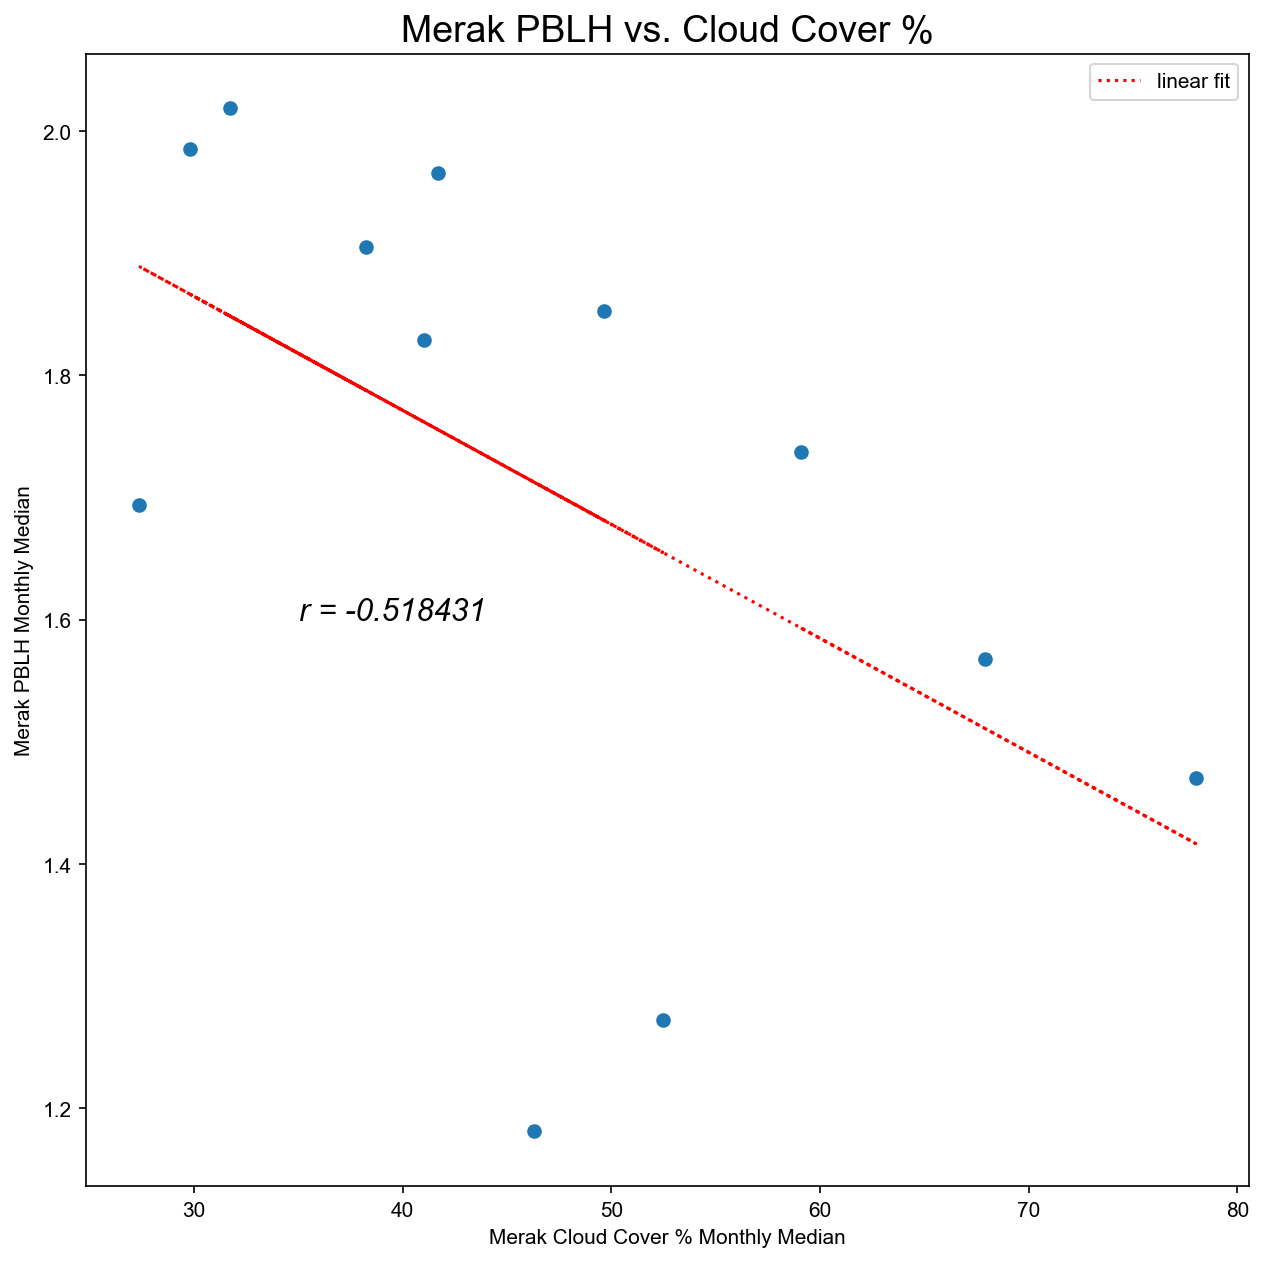

In [104]:
fit = np.polyfit(cloud_merra_monthly['merak_cf'],cloud_merra_monthly['mer_pblh'],1)
fit_fn = np.poly1d(fit) 
plt.figure(figsize=(10,10),dpi=150)
plt.scatter(cloud_merra_monthly['merak_cf'],cloud_merra_monthly['mer_pblh'],marker='o')
plt.plot(cloud_merra_monthly['merak_cf'], fit_fn(cloud_merra_monthly['merak_cf']), ':r',label='linear fit')
plt.title('Merak PBLH vs. Cloud Cover %',fontsize=18)
plt.text(35,1.6,'r = -0.518431',fontsize=15,fontstyle="italic")
plt.ylabel('Merak PBLH Monthly Median')
plt.xlabel('Merak Cloud Cover % Monthly Median')
plt.legend(loc='upper right')
plt.savefig('../Plots/Merak PBLH vs Cloud Cover.png')
plt.show()
plt.close()

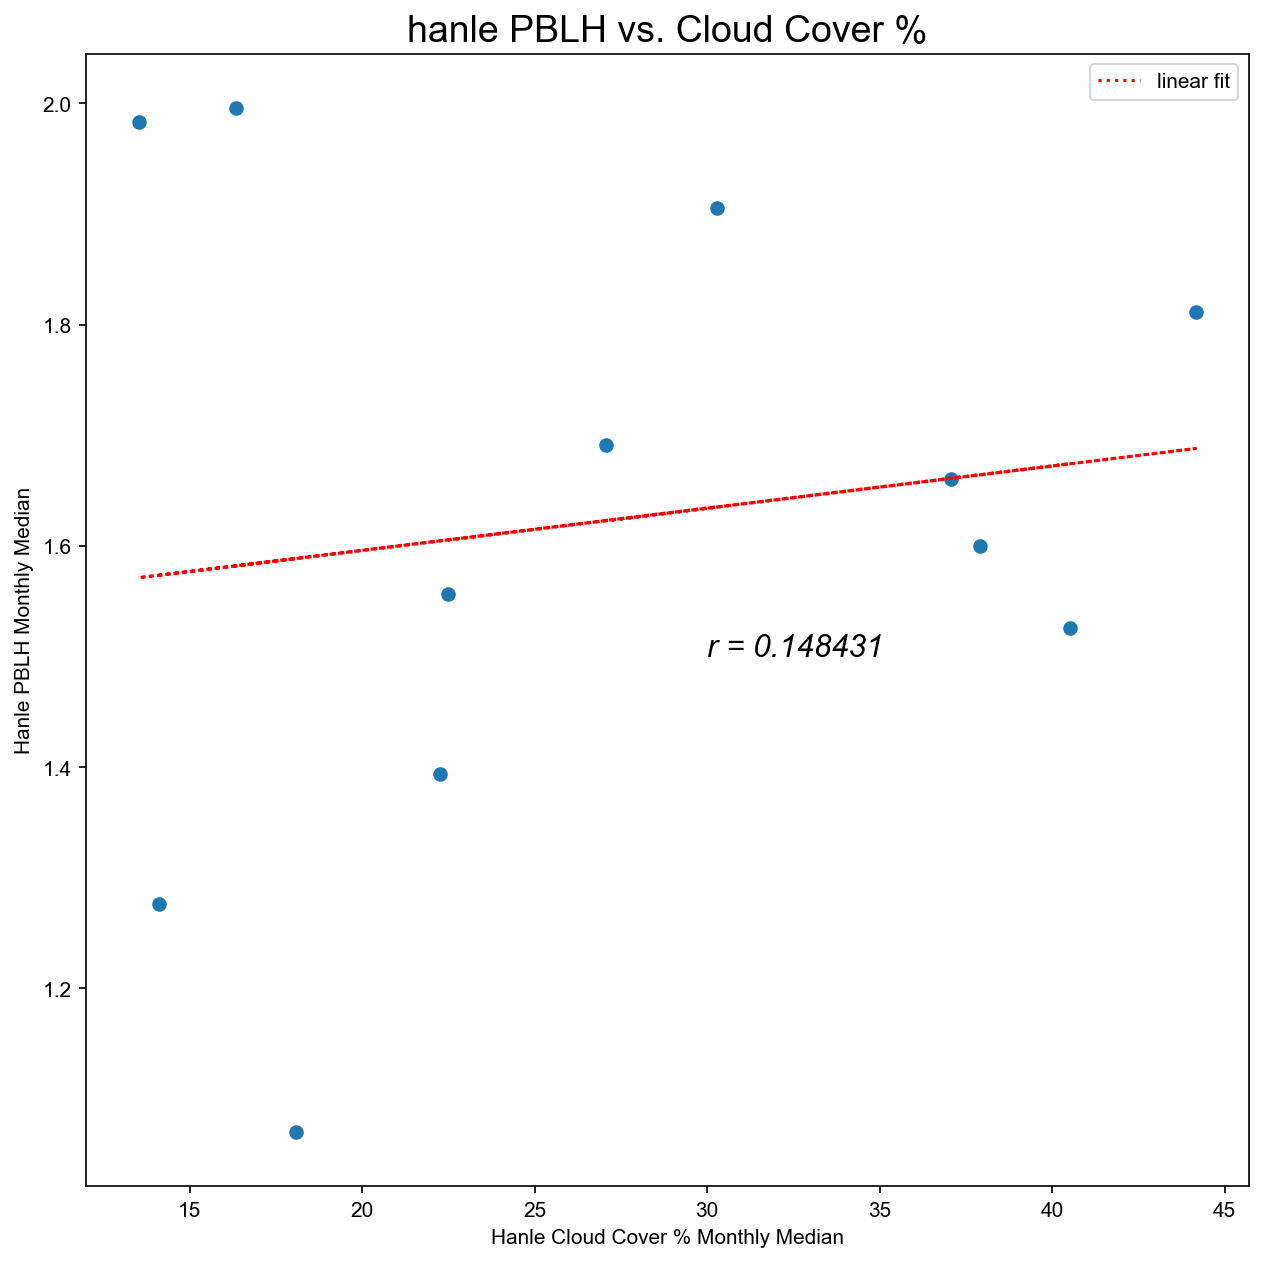

In [105]:
fit = np.polyfit(cloud_merra_monthly['hanle_cf'],cloud_merra_monthly['han_pblh'],1)
fit_fn = np.poly1d(fit) 
plt.figure(figsize=(10,10),dpi=150)
plt.scatter(cloud_merra_monthly['hanle_cf'],cloud_merra_monthly['han_pblh'],marker='o')
plt.plot(cloud_merra_monthly['hanle_cf'], fit_fn(cloud_merra_monthly['hanle_cf']), ':r',label='linear fit')
plt.title('hanle PBLH vs. Cloud Cover %',fontsize=18)
plt.text(30,1.5,'r = 0.148431',fontsize=15,fontstyle="italic")
plt.ylabel('Hanle PBLH Monthly Median')
plt.xlabel('Hanle Cloud Cover % Monthly Median')
plt.legend(loc='upper right')
plt.savefig('../Plots/Hanle PBLH vs Cloud Cover.png')
plt.show()
plt.close()

In [106]:
merra_full_time = merra_full[['date','time','han_pblh','mer_pblh']].groupby('time').median().reset_index()

In [107]:
merra_full_time['time'] =  merra_full_time['time'].apply(lambda x: x[0:5])

In [108]:
merra_full_time.head(10)

,time,han_pblh,mer_pblh
0,00:30,0.454725,0.650515
1,01:30,0.765026,0.895647
2,02:30,1.245785,1.348337
3,03:30,1.661033,1.728465
4,04:30,2.022446,2.050918
5,05:30,2.312574,2.316116
6,06:30,2.539296,2.533797
7,07:30,2.690561,2.686663
8,08:30,2.765394,2.763805
9,09:30,2.748072,2.756228


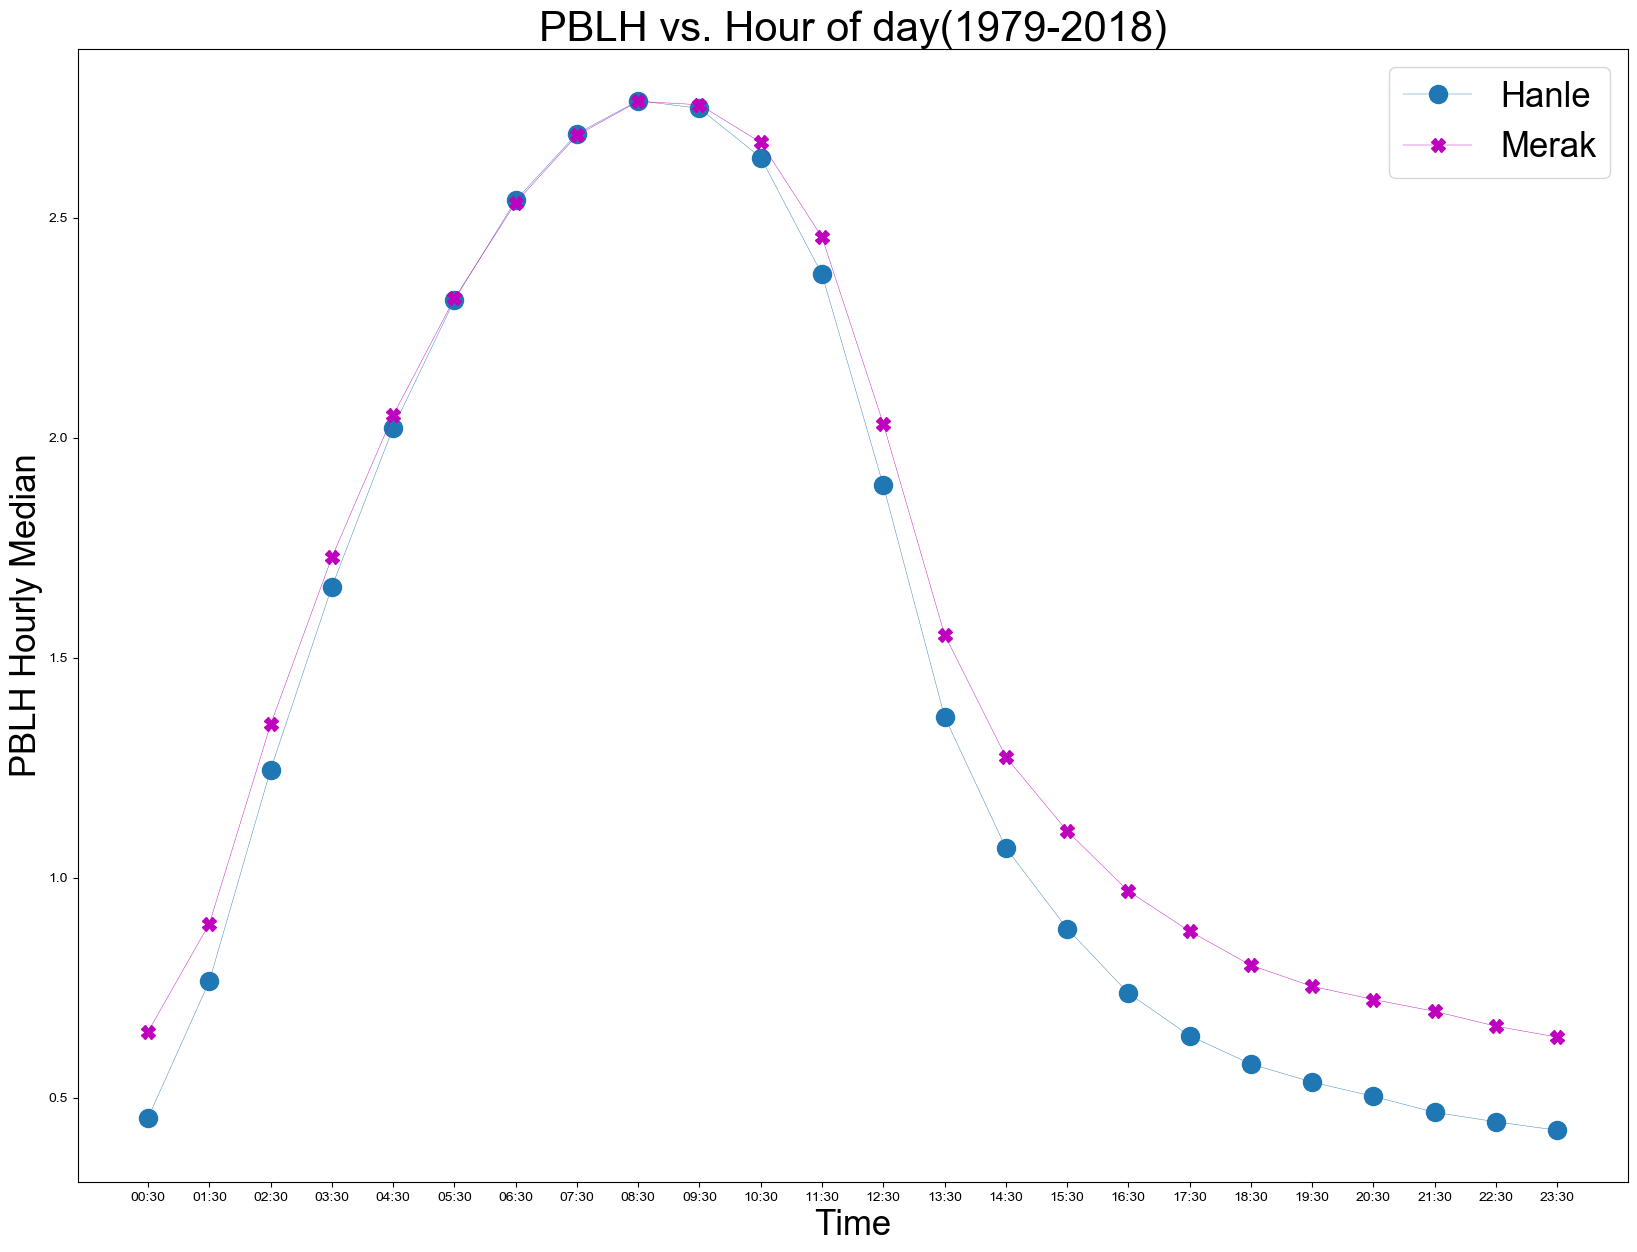

In [109]:
plt.figure(figsize=(20,15),dpi=100)
plt.plot(merra_full_time['time'],merra_full_time['han_pblh'],marker='o',markersize=13,label="Hanle",linewidth='0.3')
plt.plot(merra_full_time['time'],merra_full_time['mer_pblh'],c='m',marker='X',markersize=10,label='Merak',linewidth='0.3')
#plt.plot(merra_full_time['hanle_cf'], fit_fn(merra_full_time['hanle_cf']), ':r',label='linear fit')
plt.title('PBLH vs. Hour of day(1979-2018)',fontsize=30)
#plt.text(10,1.5,'r = -0.078431',fontsize=15,fontstyle="italic")
plt.xlabel('Time',fontsize=25)
plt.ylabel('PBLH Hourly Median',fontsize=25)
plt.legend(loc='upper right',fontsize=25)
plt.savefig('../Plots/PBLH hourly Median.png')
plt.show()
plt.close()

In [110]:
merra_full_month = merra_full.copy(deep=True)

In [111]:
merra_full_month['month'] = merra_full_month['datetime'].apply(lambda x:x.month)

In [112]:
merra_full_monthly = merra_full_month[['month','han_pblh','mer_pblh']].groupby('month').median().reset_index()

In [113]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
          'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

In [114]:
months[11]

'Dec'

In [115]:
merra_full_monthly['month'] = merra_full_monthly['month'].apply(lambda x: months[x-1])

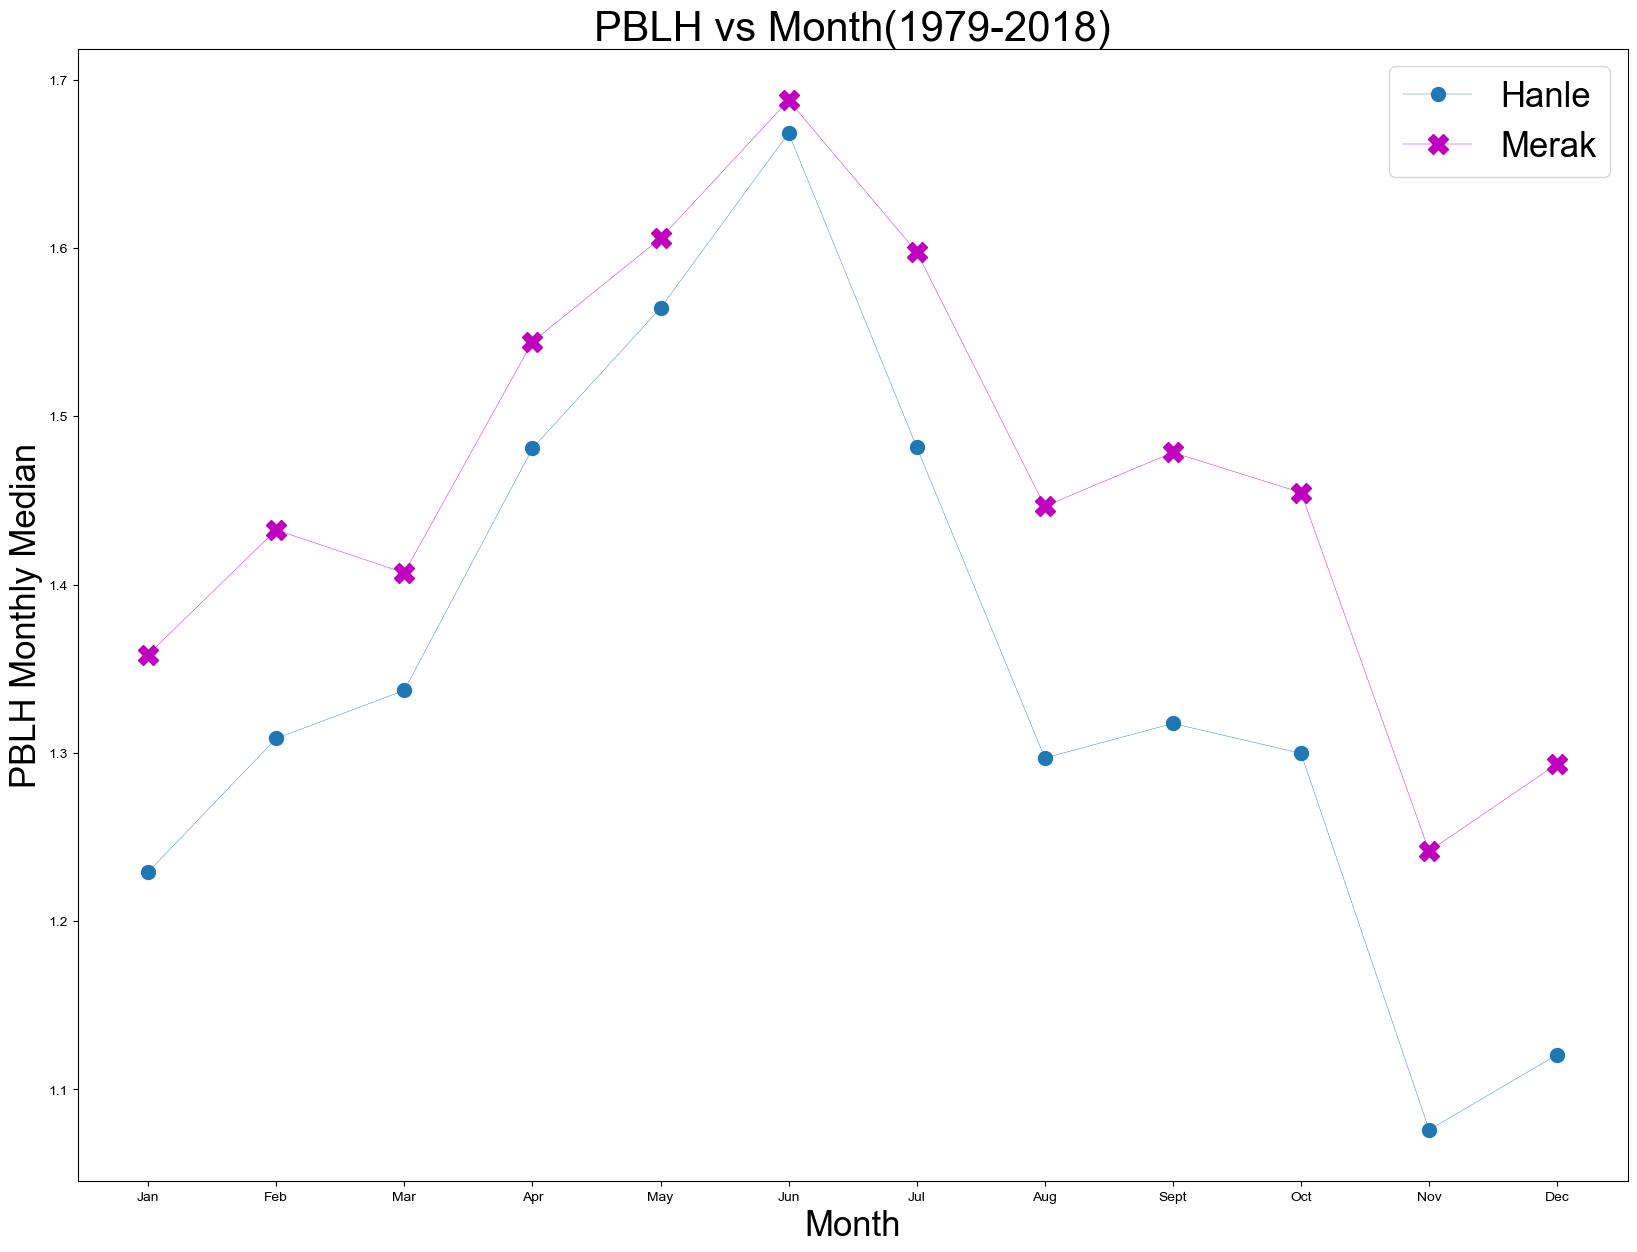

In [116]:
plt.figure(figsize=(20,15),dpi=100)
plt.plot(merra_full_monthly['month'],merra_full_monthly['han_pblh'],marker='o',label='Hanle',markersize=10,linewidth='0.3')
plt.plot(merra_full_monthly['month'],merra_full_monthly['mer_pblh'],c='m',marker='X',label="Merak",markersize=15,linewidth='0.3')
#plt.plot(merra_full_month['hanle_cf'], fit_fn(merra_full_month['hanle_cf']), ':r',label='linear fit')
plt.title('PBLH vs Month(1979-2018)',fontsize=30)
#plt.text(10,1.5,'r = -0.078431',fontsize=15,fontstyle="italic")
plt.xlabel('Month',fontsize=25)
plt.ylabel('PBLH Monthly Median',fontsize=25)
plt.legend(loc='upper right',fontsize=25)
plt.savefig('../Plots/PBLH Monthly Median.png')
plt.show()
plt.close()

In [117]:
era_full = pd.read_csv('../Output Data/erai5_full.txt',sep='\t')

In [118]:
era_full['datetime'] = era_full[['date','time']].apply(lambda x:x[0]+' '+x[1],axis=1)

era_full['datetime'] = era_full['datetime'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [119]:
era_full['rounded'] = era_full['datetime'].apply(lambda x: round_to_half_hour(x))

In [120]:
era_merra = pd.merge(merra_full,era_full,how='left',left_on=['datetime'],right_on=['rounded'])

In [125]:
era_merra['time'] = era_merra.time_x.apply(lambda x:x[0:5])

In [122]:
era_merra.head(10)

,date_x,time_x,han_pblh,mer_pblh,datetime_x,date_y,time_y,hanle_pblh_era5,merak_pblh_era5,datetime_y,rounded,time
0,1980-01-01,00:30:00,1.036853,1.014353,1980-01-01 00:30:00,1980-01-01,00:00:00,0.127757,0.082464,1980-01-01 00:00:00,1980-01-01 00:30:00,00:30
1,1980-01-01,01:30:00,0.693095,0.980920,1980-01-01 01:30:00,1980-01-01,01:00:00,0.125760,0.096350,1980-01-01 01:00:00,1980-01-01 01:30:00,01:30
2,1980-01-01,02:30:00,1.593738,1.376788,1980-01-01 02:30:00,1980-01-01,02:00:00,0.105323,0.111919,1980-01-01 02:00:00,1980-01-01 02:30:00,02:30
3,1980-01-01,03:30:00,2.704865,2.071465,1980-01-01 03:30:00,1980-01-01,03:00:00,0.121121,0.110499,1980-01-01 03:00:00,1980-01-01 03:30:00,03:30
4,1980-01-01,04:30:00,2.684119,2.506818,1980-01-01 04:30:00,1980-01-01,04:00:00,0.234643,0.107764,1980-01-01 04:00:00,1980-01-01 04:30:00,04:30
5,1980-01-01,05:30:00,2.541587,2.717687,1980-01-01 05:30:00,1980-01-01,05:00:00,0.493752,0.134168,1980-01-01 05:00:00,1980-01-01 05:30:00,05:30
6,1980-01-01,06:30:00,2.603247,2.804347,1980-01-01 06:30:00,1980-01-01,06:00:00,0.973856,0.205859,1980-01-01 06:00:00,1980-01-01 06:30:00,06:30
7,1980-01-01,07:30:00,2.771694,2.825494,1980-01-01 07:30:00,1980-01-01,07:00:00,1.898532,0.271292,1980-01-01 07:00:00,1980-01-01 07:30:00,07:30
8,1980-01-01,08:30:00,2.576038,2.767937,1980-01-01 08:30:00,1980-01-01,08:00:00,2.550945,0.394214,1980-01-01 08:00:00,1980-01-01 08:30:00,08:30
9,1980-01-01,09:30:00,2.440382,2.309582,1980-01-01 09:30:00,1980-01-01,09:00:00,2.460327,0.914411,1980-01-01 09:00:00,1980-01-01 09:30:00,09:30


In [123]:
era_merra = era_merra.groupby(['time_x']).mean().reset_index()

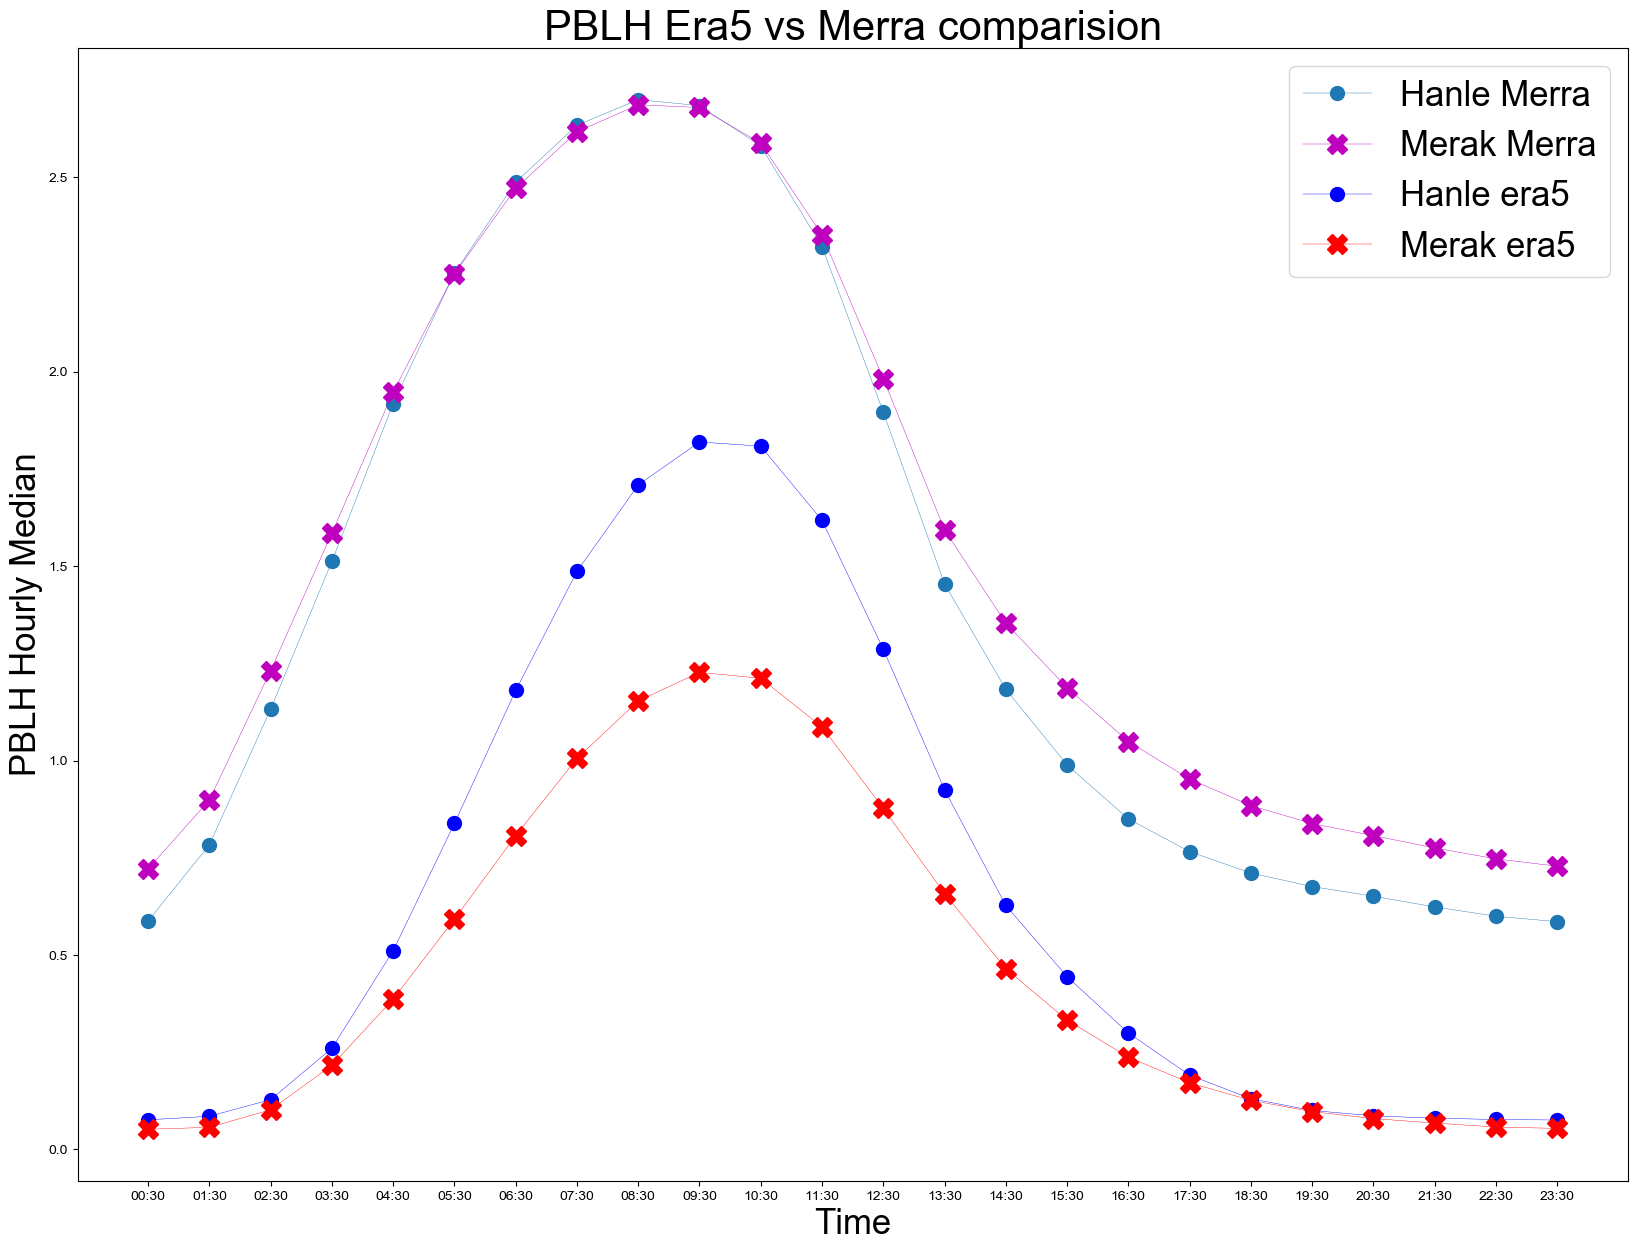

In [126]:
plt.figure(figsize=(20,15),dpi=100)
plt.plot(era_merra['time'],era_merra['han_pblh'],marker='o',label='Hanle Merra',markersize=10,linewidth='0.3')
plt.plot(era_merra['time'],era_merra['mer_pblh'],c='m',marker='X',label="Merak Merra",markersize=15,linewidth='0.3')
plt.plot(era_merra['time'],era_merra['hanle_pblh_era5'],c='b',marker='o',label='Hanle era5',markersize=10,linewidth='0.3')
plt.plot(era_merra['time'],era_merra['merak_pblh_era5'],c='r',marker='X',label="Merak era5",markersize=15,linewidth='0.3')
#plt.plot(merra_full_month['hanle_cf'], fit_fn(merra_full_month['hanle_cf']), ':r',label='linear fit')
plt.title('PBLH Era5 vs Merra comparision',fontsize=30)
#plt.text(10,1.5,'r = -0.078431',fontsize=15,fontstyle="italic")
plt.xlabel('Time',fontsize=25)
plt.ylabel('PBLH Hourly Median',fontsize=25)
plt.legend(loc='upper right',fontsize=25)
plt.savefig('../Plots/era5 merra.png')
plt.show()
plt.close()

In [ ]:
era_merra.corr()

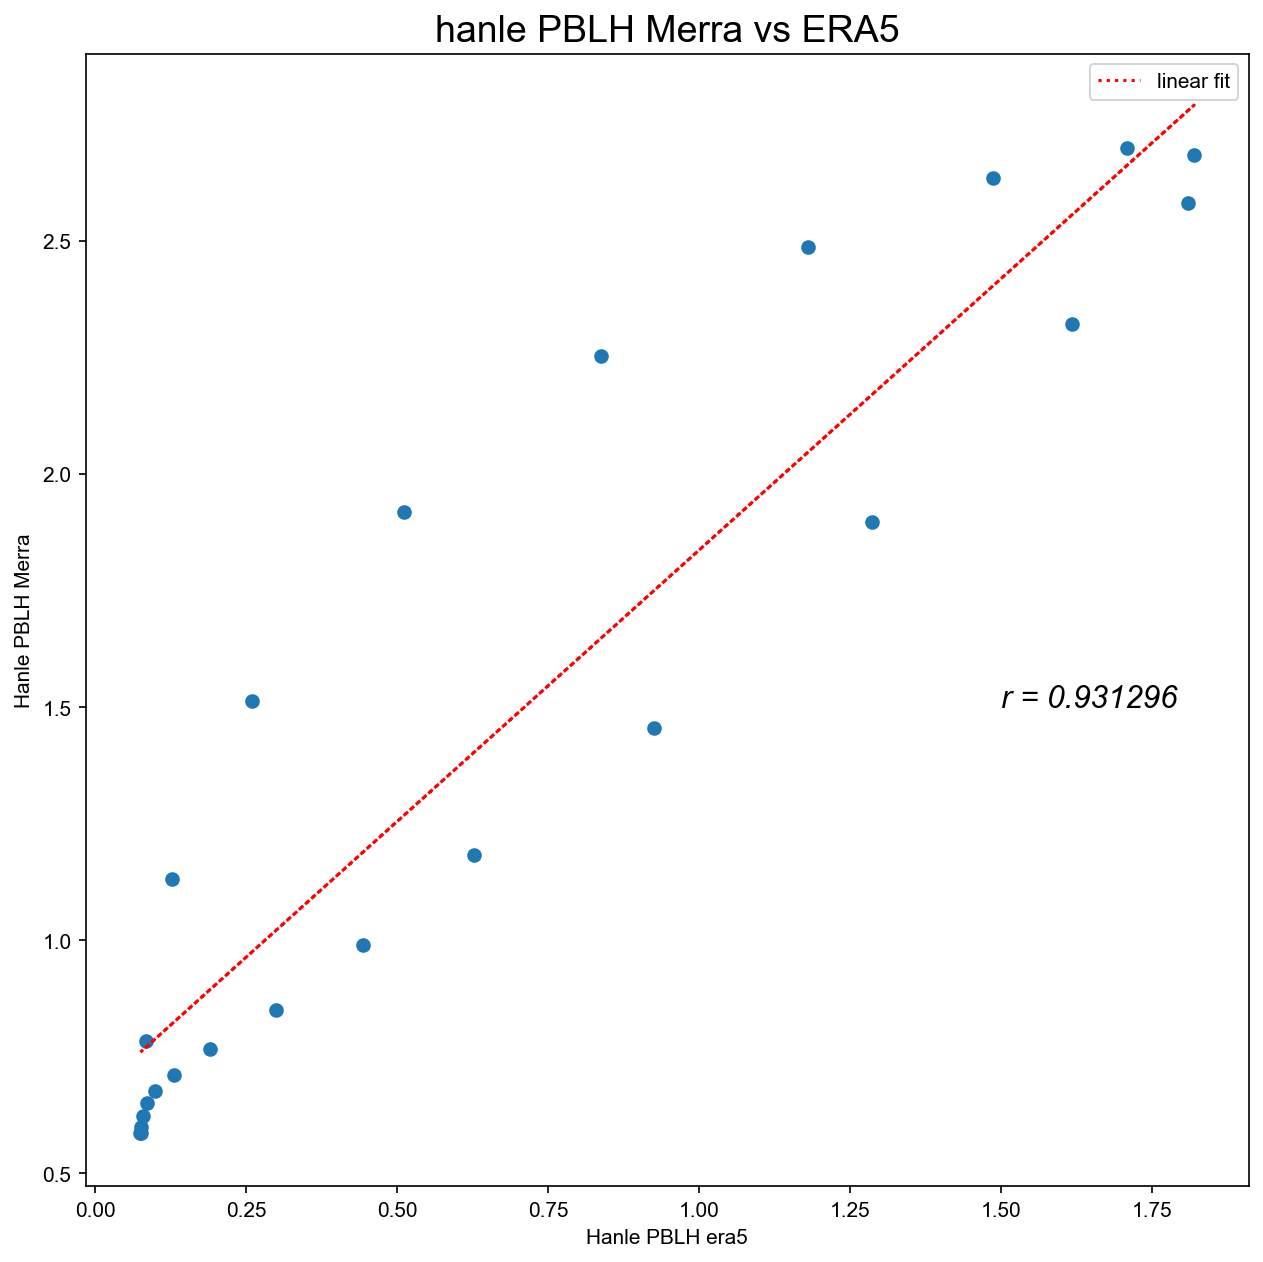

In [127]:
fit = np.polyfit(era_merra['hanle_pblh_era5'],era_merra['han_pblh'],1)
fit_fn = np.poly1d(fit) 
plt.figure(figsize=(10,10),dpi=150)
plt.scatter(era_merra['hanle_pblh_era5'],era_merra['han_pblh'],marker='o')
plt.plot(era_merra['hanle_pblh_era5'], fit_fn(era_merra['hanle_pblh_era5']), ':r',label='linear fit')
plt.title('hanle PBLH Merra vs ERA5',fontsize=18)
plt.text(1.5,1.5,'r = 0.931296',fontsize=15,fontstyle="italic")
plt.ylabel('Hanle PBLH Merra')
plt.xlabel('Hanle PBLH era5')
plt.legend(loc='upper right')
plt.savefig('../Plots/ERA5 Merra Correlation.png')
plt.show()
plt.close()